# Moving to Visual Studio Code
This script outlines the steps to move from traditional IDE for R, Python, and MATLAB to Visual Studio Code (VS Code) for data science and reproducibility. In this guide, we will cover 1) setting up VS Code, 2) installing necessary extensions, and 3) configuring the environment for Python and R. We will then review 4) how to integrate GitHub for version control, code and data sharing, and publishing websites.

## Why Use VS Code for Data Science

- **Multi-language support in a single environment**
  - Seamlessly run R, Python, MATLAB, Julia, and more in the same project or notebook.
  - Great for workflows that combine machine learning, data visualization, and statistical analysis across languages.

- **Better AI-assisted coding**
  - Integrates easily with multiple AI coding assistants (Copilot, ChatGPT, Claude) for auto-completion, debugging, and code generation.

- **Strong Git/GitHub integration**
  - Native version control and repository management.
  - Commit, push, pull, and branch directly from VS Code without leaving the editor.

- **Extensible and customizable**
  - Thousands of extensions for linters, formatters, debugging, notebooks, and project management.
  - Tailor VS Code to your exact workflow.

- **Notebook support**
  - Run `.ipynb` Jupyter notebooks directly in VS Code with full language kernel support (Python, R, etc.).
  - Avoid context-switching between IDEs or cloud platforms.

- **Local and cloud flexibility**
  - Work entirely locally without internet if desired (unlike Colab).
  - Can still connect to remote servers or cloud compute when needed.

- **Project organization and reproducibility**
  - Full file explorer, terminal, and integrated debugger.
  - Makes managing multi-language, multi-file projects easier than in RStudio or Colab.

- **Performance**
  - Runs locally, so large datasets or intensive computations aren’t limited by cloud session restrictions like in Colab.

## Setting up VSCode
### Download
Step 1: Download VSCode: https://code.visualstudio.com/download 
Step 2: Take a second to get orientated to the layout of VSCode: https://youtu.be/KKUbC4S93ws?si=K3W8fXTcHY0dwNyf

### Extensions
In order to write, edit, and share code, you will need to install a few extensions depending on the coding language you use. 
To start:
Click on the side bar boxes icon 

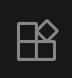

#### Python
Search for "Python" and make sure to include at minimum Python from Microsoft 

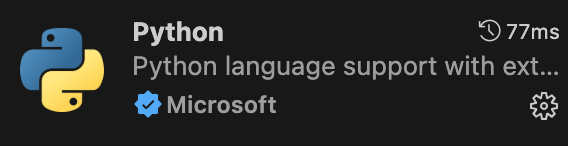

This video is very helpful for installing Python extensions: https://www.youtube.com/watch?app=desktop&v=cUAK4x_7thA

#### R
Search for "R" and at the minimum, install these extensions

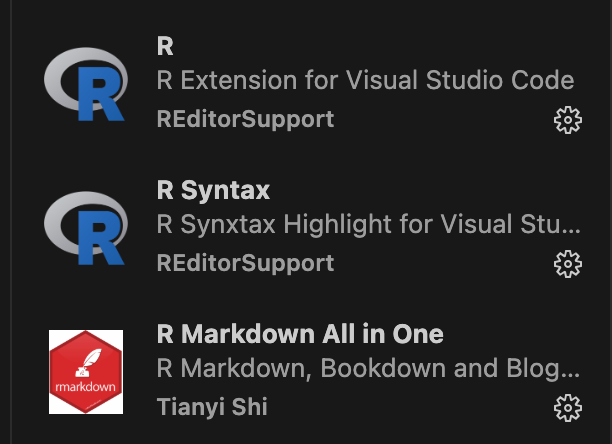

This video has step by step instructions: https://www.youtube.com/watch?v=rKPfssR66GM

#### MATLAB

Yes- you can run MATLAB scripts in VSCode now! Similarly, you'll search for MATLAB in the Extensions and download the one by MathWorks
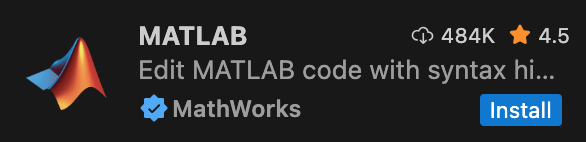
This video gives a simple tutorial:https://www.youtube.com/watch?v=X0eUJTbsSSg

*NOTE: You’ll need to have each language (R, Python, and MATLAB) installed on your computer for VS Code to run them properly. In some cases, you may also need to map the language installation to VS Code. The links above provide instructions for doing this, and ChatGPT can also be a great resource if you run into setup issues. Setting things up may involve using your computer’s terminal (or the built-in terminal in VS Code)... but don’t get discouraged, the initial effort is well worth it!*



In [ ]:
# Make sure to add the code below to your settings.json file in VS Code. This allows R and RMD files to run properly in VS Code.
{
  "r.rterm.mac": "/Users/axg999/.local/bin/radian",
  "r.bracketedPaste": true,
  "files.associations": {
    "*.rmd": "markdown"
  },
  "editor.unicodeHighlight.invisibleCharacters": false
}

## Switching Languages
It is easy to switch between languages in VSCode within the same Markdown file. A few tips:
1. Keep the language in each chunk the same
2. That's really it. 

In [ ]:
# We'll start with R code to load a dataset
# You need to load packages and a good habit is to load packages needed for each chunk at the start of the chunk
library(tidyverse)
library(readr)
library(dplyr)

#set working directory
setwd("/Users/axg999/Library/CloudStorage/Box-Box/Amanda\'s\ Life/ReproRehab/VSCode")

#load data
data <- read_csv("Tulip-dataset.csv")

#confirm
head(data, 10)


Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): species
dbl (4): petal_length, petal_width, sepal_length, sepal_width

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


species,petal_length,petal_width,sepal_length,sepal_width
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Tulip Tarda,4.7,1.4,7.0,3.2
Tulip Tarda,4.5,1.5,6.4,3.2
Tulip Tarda,4.9,1.5,6.9,3.1
Tulip Tarda,4.0,1.3,5.5,2.3
Tulip Tarda,4.6,1.5,6.5,2.8
Tulip Tarda,4.5,1.3,5.7,2.8
Tulip Tarda,4.7,1.6,6.3,3.3
Tulip Tarda,3.3,1.0,4.9,2.4
Tulip Tarda,4.6,1.3,6.6,2.9


In [ ]:
#data wrangling
data <- data %>%
  mutate(petal_total = petal_length + petal_width)

In [ ]:
head(data, 10)


species,petal_length,petal_width,sepal_length,sepal_width,petal_total
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Tulip Tarda,4.7,1.4,7.0,3.2,6.1
Tulip Tarda,4.5,1.5,6.4,3.2,6.0
Tulip Tarda,4.9,1.5,6.9,3.1,6.4
Tulip Tarda,4.0,1.3,5.5,2.3,5.3
Tulip Tarda,4.6,1.5,6.5,2.8,6.1
Tulip Tarda,4.5,1.3,5.7,2.8,5.8
Tulip Tarda,4.7,1.6,6.3,3.3,6.3
Tulip Tarda,3.3,1.0,4.9,2.4,4.3
Tulip Tarda,4.6,1.3,6.6,2.9,5.9


If I want to do a visualization of this data in Python, note that when you’re in a Jupyter notebook (.ipynb) in VS Code, each kernel (R, Python, Julia, etc.) runs in its own separate process/environment.

That means if you load your dataset into memory in R as data, it only exists inside the R kernel. If you switch to a Python kernel, Python doesn't know about it. 

So the simplest way to handle this is to export the new, modified dataset and then import it into Python

In [ ]:
# R: write out to csv
write.csv(data, "data_export.csv", row.names = FALSE)
# we've already set our working directory, so this will save it in the same place as the original dataset

To switch to a different language, click on the top right of the editor where it says "R" and select your version of Python. 
OR
You can switch it through the Command Palette
- Mac: cmd+Shift+P
- Windows/Linux:ctrl+Shift+P
Search for Notebook: Select Notebook Kernel
Then select one of your loaded languages

In [1]:
# Python: read it back in
import pandas as pd
df = pd.read_csv("data_export.csv")


In [2]:
df.head(10)

,species,petal_length,petal_width,sepal_length,sepal_width,petal_total
0,Tulip Tarda,4.7,1.4,7.0,3.2,6.1
1,Tulip Tarda,4.5,1.5,6.4,3.2,6.0
2,Tulip Tarda,4.9,1.5,6.9,3.1,6.4
3,Tulip Tarda,4.0,1.3,5.5,2.3,5.3
4,Tulip Tarda,4.6,1.5,6.5,2.8,6.1
5,Tulip Tarda,4.5,1.3,5.7,2.8,5.8
6,Tulip Tarda,4.7,1.6,6.3,3.3,6.3
7,Tulip Tarda,3.3,1.0,4.9,2.4,4.3
8,Tulip Tarda,4.6,1.3,6.6,2.9,5.9
9,Tulip Tarda,3.9,1.4,5.2,2.7,5.3


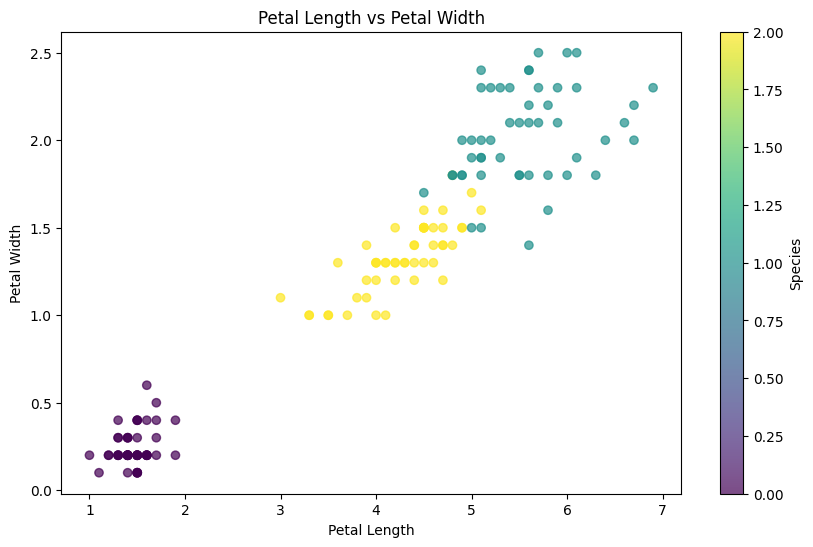

In [3]:
# Now we can visualize the data in Python
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['petal_length'], df['petal_width'], c=df['species'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Species')
plt.show()

## Separate Files

You can also create separate files for each language, and RMD that is R and .ipynb that is Python. This keeps things a bit cleaner, but you're still working within one platform or environment, toggling between the two.

There is an added benefit that you can work in R Studio if that's more comfortable and it will automatically update on VSCode mark down file. 

### R Studio and VS Code

**In VS Code**

You can create a new file in your project folder and save it as mytulip.Rmd.

VS Code will recognize it as text, and if you have the R extension installed (like R Tools or R Language support), you’ll get syntax highlighting for R code chunks.

But, knitting (rendering the .Rmd to HTML, PDF, Word, etc.) usually works best inside RStudio since it has the built-in knitting engine and preview pane.

**In R Studio**

You can go to File → New File → R Markdown… and create one with the starter template.

Then save it inside the same folder where your project is, so everything stays organized.

This makes knitting seamless and you can switch back and forth between VS Code (editing) and RStudio (knitting/executing).